# About
This notebook is to explore the various node dispersion techniques that networkx provides.

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from src.invoices.invoice_simulator import make_invoice_data
import networkx as nx
import matplotlib.pyplot as plt
G = make_invoice_data()[0]

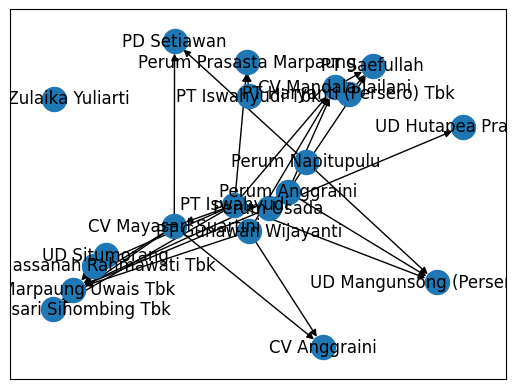

In [8]:
plt.subplots()
nx.draw_networkx(G, pos=nx.spring_layout(G))
plt.show()

In [9]:
sub_G = G.subgraph(list(G.nodes)[:3])

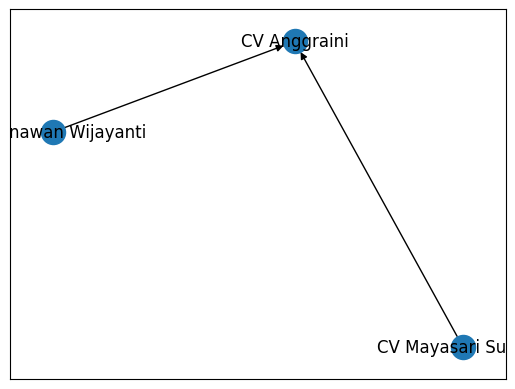

In [10]:
nx.draw_networkx(sub_G)

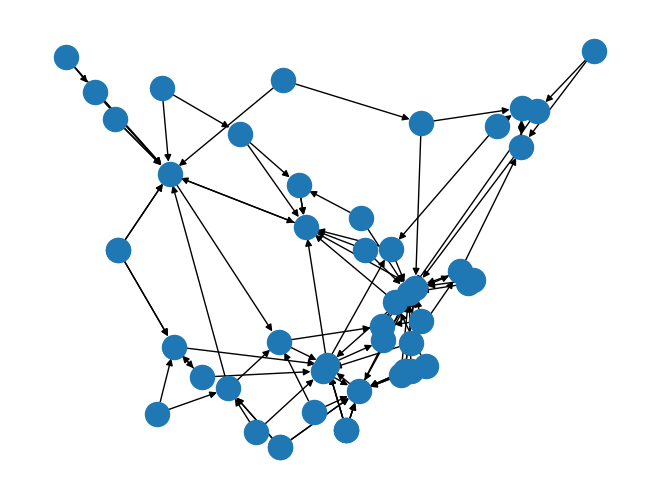

In [11]:
G = nx.random_k_out_graph(50, 2, 0.3, self_loops=False)
nx.draw(G, pos=nx.spectral_layout(G))

In [12]:
from typing import Literal


def load_graph_data(mode: Literal["invoices", "random"] = "invoices") -> nx.DiGraph:
    if mode == "invoices":
        return make_invoice_graph()
    elif mode == "random":
        return nx.generators.directed._random_k_out_graph_python(
            30, 2, 0.3, self_loops=False, seed=42
        )


G = load_graph_data(mode="random")

In [13]:
G.number_of_nodes()

30

In [14]:
sub_G = G.copy()
sub_G = sub_G.subgraph([1,2,3])
nx.Graph(sub_G).number_of_nodes()

3

In [15]:
G = nx.DiGraph()
edges = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 4),
    (4, 1),
    (4, 5)
]
G.add_edges_from(edges)

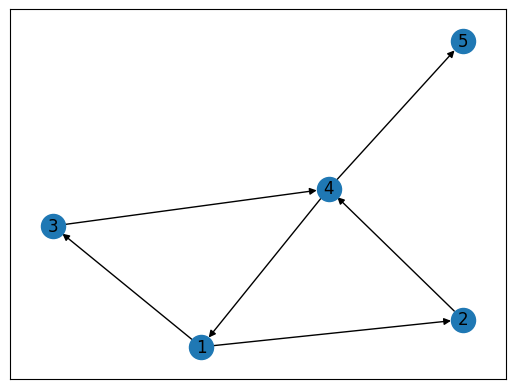

In [16]:
nx.draw_networkx(G)

In [36]:
successors = nx.dfs_successors(G, source=1, depth_limit=1)

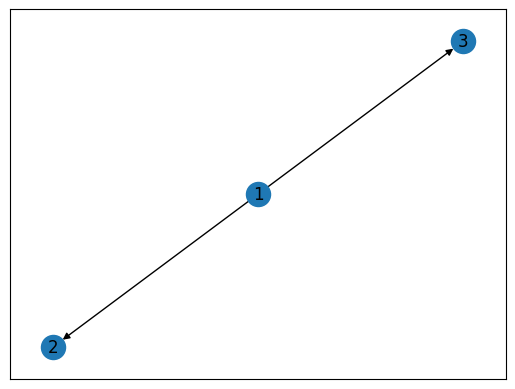

In [37]:
nx.draw_networkx(G.subgraph([n for nodes in successors.values() for n in nodes] + [1]))